In [2]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# The starter code is short and simple, take a look!
from starter import *

import random

# Phase 1 - Create Inputs

In [4]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

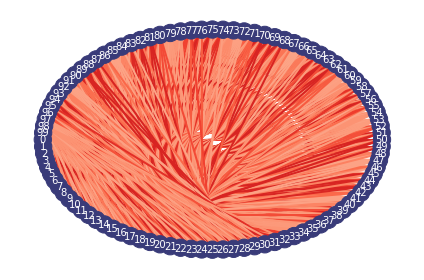

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

In [5]:
G = nx.empty_graph(N_SMALL)
small(G)
visualize(G)
write_input(G, 'inputs/small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
visualize(G)
write_input(G, 'inputs/medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
visualize(G)
write_input(G, 'inputs/large.in')

# Phase 2 - Implement your Solver

In [6]:
from greedy_algorithm import *

In [7]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(1, 15)
    for v in G.nodes:
        G.nodes[v]['team'] = random.randint(1, k)

In [8]:
# Assign a team to v with G.nodes[v]['team'] = team_id
# Access the team of v with team_id = G.nodes[v]['team']

def solve(G: nx.Graph):
    
    # TODO: Try updating specific nodes, and seeing which changes to make based on homework 11 algorithm
    # TODO: Decrease the amount of nodes updated as time goes on
    # TODO: Do these steps for k-1, k, and k+1, pick the best

    k = optimize_k(G)
    max_k_cut_solve(k)(G)
    validate_output(G)

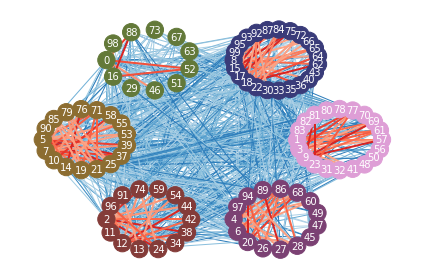

random_solve 89311.47841864324


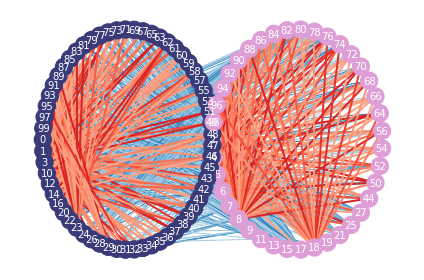

solve 210929.3371690421


In [9]:
solvers = [random_solve, solve]

for solver in solvers:
    G = read_input('inputs/small.in')
    solver(G)
    validate_output(G)
    visualize(G)
    print(solver.__name__, score(G))


In [31]:
run(max_k_cut_solve(2), 'inputs/small.in', 'outputs/small.out')

not overwriting because current score is 50082.31662461171
inputs/small.in: cost 210929.3371690421


In [32]:
# TODO: record the best solutions by only saving if the score is only than the previous best for that file

run_all(random_solve, 'inputs', 'outputs')

  0%|          | 0/4 [00:00<?, ?it/s]

not overwriting because current score is 50239.61811653117
inputs/medium.in: cost 2249805.87212707
not overwriting because current score is 1219.2493960703473
inputs/example.in: cost 98776.77232903973
not overwriting because current score is 17663.636220431
inputs/large.in: cost 523285.5424693967
not overwriting because current score is 50082.31662461171
inputs/small.in: cost 142579.71347797307


In [23]:
tar('outputs', True)